In [ ]:

suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
suppressMessages(library(ComplexHeatmap))
library(glue)



In [ ]:
getwd()

In [ ]:
# genome wide correlation
gw.mx <- fread("../code/results/reviews/BigwigSummary/Genome/corr.matrix")
colnames(gw.mx) <- colnames(gw.mx) %>% str_replace_all("(\\.bw)|(\\')", "")
gw.mx[, V1 := str_replace_all(V1, "(\\.bw)|(\\')", "")]
gw.mx[, V1 := factor(V1, glue("ATAC{1:12}"))]

In [ ]:
gw.mx

In [ ]:
lkup <- as.data.table(list(id = glue("ATAC{1:12}")))

lkup[, `:=`(
    id = as.character(id),
    timepoint = c("ES", "ES", "1H", "1H", "4H", "4H", "15H", "15H", "D1", "D1", "D4", "D4"),
    repl = rep(c("R1", "R2"), 6)
)]

lkup[, lab := paste(timepoint, repl)]

In [ ]:
gw.mx %>% 
    column_to_rownames('V1') %>% 
    as.matrix

In [ ]:
lkup

In [ ]:
row_labels = left_join(gw.mx[, .(V1)], lkup[, .(id, lab)], by = c(V1 = "id")) %>% deframe

In [ ]:
row_labels

In [44]:
col_labels = colnames(gw.mx[, -c("V1")])

In [ ]:
gw.mx

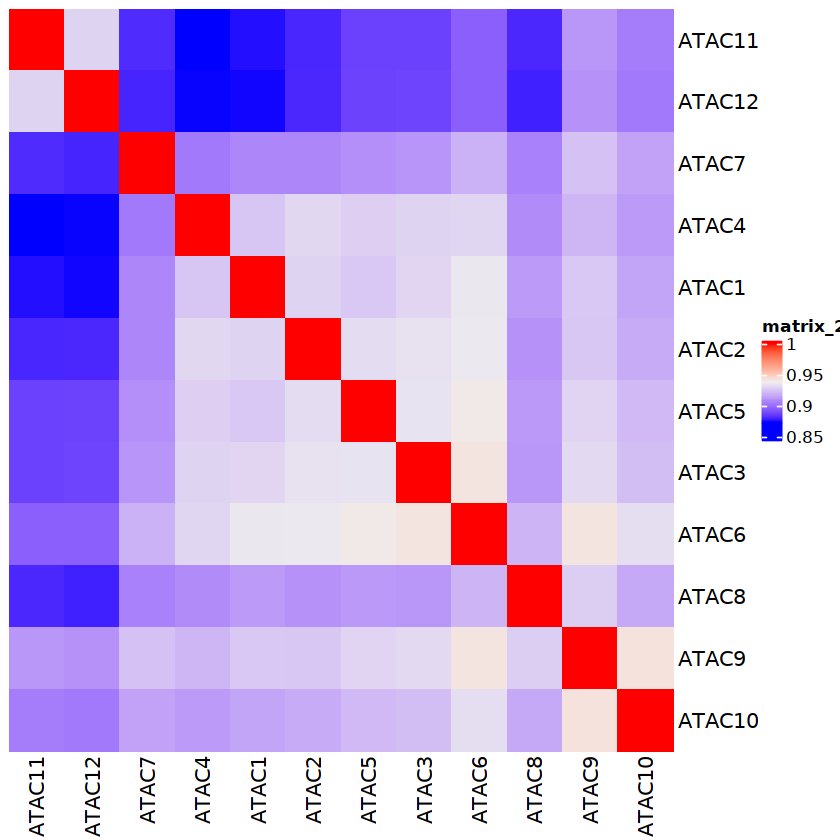

In [17]:
gw.mx %>% 
    column_to_rownames('V1') %>% 
    as.matrix %>% 
    Heatmap(cluster_rows = F, cluster_columns = F)

In [16]:
?Heatmap

Heatmap {ComplexHeatmap},R Documentation
matrix,"A matrix. Either numeric or character. If it is a simple vector, it will be converted to a one-column matrix."
col,"A vector of colors if the color mapping is discrete or a color mapping function if the matrix is continuous numbers (should be generated by colorRamp2). If the matrix is continuous, the value can also be a vector of colors so that colors can be interpolated. Pass to ColorMapping. For more details and examples, please refer to https://jokergoo.github.io/ComplexHeatmap-reference/book/a-single-heatmap.html#colors ."
name,Name of the heatmap. By default the heatmap name is used as the title of the heatmap legend.
na_col,Color for NA values.
rect_gp,Graphic parameters for drawing rectangles (for heatmap body). The value should be specified by gpar and fill parameter is ignored.
color_space,The color space in which colors are interpolated. Only used if matrix is numeric and col is a vector of colors. Pass to colorRamp2.
border,Whether draw border. The value can be logical or a string of color.
border_gp,"Graphic parameters for the borders. If you want to set different parameters for different heatmap slices, please consider to use decorate_heatmap_body."
cell_fun,"Self-defined function to add graphics on each cell. Seven parameters will be passed into this function: j, i, x, y, width, height, fill which are column index, row index in matrix, coordinate of the cell, the width and height of the cell and the filled color. x, y, width and height are all unit objects."
layer_fun,"Similar as cell_fun, but is vectorized. Check https://jokergoo.github.io/ComplexHeatmap-reference/book/a-single-heatmap.html#customize-the-heatmap-body ."
